In [161]:
import numpy as np
import math as m
from sympy import *
#from sympy.abc import x
import pylab as py
from JSAnimation import IPython_display
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.interpolate import interp1d
%matplotlib inline

In [162]:
print 'Enter number of segments'
n = int(raw_input()) #кол-во отрезков
print 'Enter ends of segment'
a , b = raw_input().split() #отрезок
a = float(a)
b = float(b)
h = (b - a) / n

Enter number of segments
100
Enter ends of segment
-1 1


$$
\frac{\partial \vec U}{\partial t} + A \frac{\partial \vec U}{\partial x} = 0
$$

Enter A

In [163]:
l = 1
m = 1
rho = 1

In [164]:
A = np.array([[0,0,0,-(l+2*m),0],[0,0,0,-l,0],[0,0,0,0,-m],[-1./rho,0,0,0,0],[0,0,-1./rho,0,0]])
lam, OMEGA_ = LA.eig(A)
print lam
print OMEGA_

[ 0.          1.73205081 -1.73205081  1.         -1.        ]
[[ 0.          0.83205029  0.83205029  0.          0.        ]
 [ 1.          0.2773501   0.2773501   0.          0.        ]
 [ 0.          0.          0.          0.70710678  0.70710678]
 [ 0.         -0.48038446  0.48038446  0.          0.        ]
 [ 0.          0.          0.         -0.70710678  0.70710678]]


In [165]:
print A

[[ 0.  0.  0. -3.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]]


In [166]:
lam = np.array([lam[2], lam[4], lam[0], lam[3], lam[1]])
print lam

[-1.73205081 -1.          0.          1.          1.73205081]


In [167]:
OMEGA_ = np.array([OMEGA_[:, 2], OMEGA_[:, 4], OMEGA_[:, 0], OMEGA_[:, 3], OMEGA_[:, 1]])
OMEGA_ = np.transpose(OMEGA_)
print OMEGA_

[[ 0.83205029  0.          0.          0.          0.83205029]
 [ 0.2773501   0.          1.          0.          0.2773501 ]
 [ 0.          0.70710678  0.          0.70710678  0.        ]
 [ 0.48038446  0.          0.          0.         -0.48038446]
 [ 0.          0.70710678  0.         -0.70710678  0.        ]]


In [168]:
OMEGA = LA.inv(OMEGA_)
print OMEGA

[[  6.00925213e-01   0.00000000e+00   0.00000000e+00   1.04083300e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   7.07106781e-01   0.00000000e+00
    7.07106781e-01]
 [ -3.33333333e-01   1.00000000e+00   0.00000000e+00   1.21876594e-16
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   7.07106781e-01   0.00000000e+00
   -7.07106781e-01]
 [  6.00925213e-01   0.00000000e+00   0.00000000e+00  -1.04083300e+00
    0.00000000e+00]]


In [169]:
np.matmul(OMEGA[1], A)

array([ 0.        ,  0.        , -0.70710678,  0.        , -0.70710678])

In [170]:
LAMBDA = np.zeros([5,5])
for i in range(5):
    LAMBDA[i,i] = lam[i]
print LAMBDA

[[-1.73205081  0.          0.          0.          0.        ]
 [ 0.         -1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          1.73205081]]


In [171]:
TEMP = np.matmul(OMEGA_, LAMBDA)
print np.matmul(TEMP, OMEGA)

[[ -1.54916829e-16   0.00000000e+00   0.00000000e+00  -3.00000000e+00
    0.00000000e+00]
 [  6.68533256e-17   0.00000000e+00   0.00000000e+00  -1.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -1.01465364e-17   0.00000000e+00
   -1.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00   0.00000000e+00  -6.85479099e-17
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -1.00000000e+00   0.00000000e+00
   -1.01465364e-17]]


In [172]:
l = 1
m = 2
rho = 1
A1 = np.array([[0,0,0,-(l+2*m),0],[0,0,0,-l,0],[0,0,0,0,-m],[-1./rho,0,0,0,0],[0,0,-1./rho,0,0]])
lam1, OMEGA1_ = LA.eig(A1)
lam1 = np.array([lam1[2], lam1[4], lam1[0], lam1[3], lam1[1]])
print lam1

[-2.23606798 -1.41421356  0.          1.41421356  2.23606798]


In [173]:
OMEGA1_ = np.array([OMEGA1_[:, 2], OMEGA1_[:, 4], OMEGA1_[:, 0], OMEGA1_[:, 3], OMEGA1_[:, 1]])
OMEGA1_ = np.transpose(OMEGA1_)
print OMEGA1_

[[ 0.89802651  0.          0.          0.          0.89802651]
 [ 0.1796053   0.          1.          0.          0.1796053 ]
 [ 0.          0.81649658  0.          0.81649658  0.        ]
 [ 0.40160966  0.          0.          0.         -0.40160966]
 [ 0.          0.57735027  0.         -0.57735027  0.        ]]


In [174]:
OMEGA1 = LA.inv(OMEGA1_)
print OMEGA1

[[  5.56776436e-01   0.00000000e+00   0.00000000e+00   1.24498996e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   6.12372436e-01   0.00000000e+00
    8.66025404e-01]
 [ -2.00000000e-01   1.00000000e+00   0.00000000e+00   4.79684096e-18
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   6.12372436e-01   0.00000000e+00
   -8.66025404e-01]
 [  5.56776436e-01   0.00000000e+00   0.00000000e+00  -1.24498996e+00
    0.00000000e+00]]


In [175]:
LAMBDA1 = np.zeros([5,5])
for i in range(5):
    LAMBDA1[i,i] = lam1[i]
print LAMBDA1
TEMP = np.matmul(OMEGA1_, LAMBDA1)
print np.matmul(TEMP, OMEGA1)

[[-2.23606798  0.          0.          0.          0.        ]
 [ 0.         -1.41421356  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.41421356  0.        ]
 [ 0.          0.          0.          0.          2.23606798]]
[[ -4.69921896e-17   0.00000000e+00   0.00000000e+00  -5.00000000e+00
    0.00000000e+00]
 [  1.07344725e-18   0.00000000e+00   0.00000000e+00  -1.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -2.37095804e-17   0.00000000e+00
   -2.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00   0.00000000e+00   3.83648115e-17
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -1.00000000e+00   0.00000000e+00
    2.24885599e-16]]


In [176]:
nul = [0,0,0,0,0]

In [177]:
# tau = h / c *(X), такое что c*tau/h < 1
print 'Enter X for tau'
X = float(raw_input())

Enter X for tau
1


In [178]:
def f(x):
    if (a + 0.25*(b-a) <= x <= a + 0.5*(b-a)):
        return (x - (a + 0.25*(b-a))) / (0.25*(b-a))
    elif (a + 0.5*(b-a) <= x <= a + 0.75*(b-a)):
        return (x - (a + 0.75*(b-a))) / (-0.25*(b-a))
    else:
        return 0

In [179]:
def fp(x):
    if x >= 0:
        return f(x)
    else:
        return 0

In [180]:
def fm(x):
    if x <= 0:
        return f(x)
    else:
        return 0

In [181]:
U = np.zeros([10,n+1]) # решение
x = np.linspace(a, b, n+1) #сетка

In [182]:
#for j in range(5):
for i in range(n+1):
    U[3][i] = f(x[i])
    U[8][i] = f(x[i])

In [183]:
right = interp1d(x, U[3])
right(0.135)

array(0.73)

In [184]:
print U[3]

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4   0.44  0.48
  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88  0.92  0.96
  1.    0.96  0.92  0.88  0.84  0.8   0.76  0.72  0.68  0.64  0.6   0.56
  0.52  0.48  0.44  0.4   0.36  0.32  0.28  0.24  0.2   0.16  0.12  0.08
  0.04 -0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.  ]


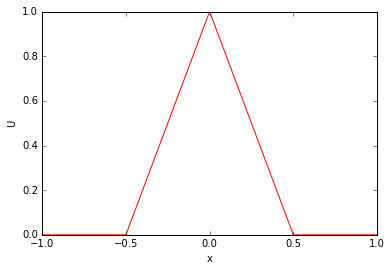

In [185]:
py.figure()
py.xlabel('x')
py.ylabel('U')
#py.ylim(0,1.1)
py.plot(x, U[3], 'r')
py.show()

In [186]:
lmax = max(max(abs(lam)), max(abs(lam1)))
tau = h * X / lmax
print tau

0.00894427191


In [187]:
lam*tau

array([-0.01549193, -0.00894427,  0.        ,  0.00894427,  0.01549193])

In [188]:
h

0.02

In [189]:
result = []
result.append(list(U[3]))
x_ed = x[1:n]

In [190]:
for j in range(50):
    Um = []
    Up = []
    Um.append(list([0,0,0,0,0]))
    Up.append(list([0,0,0,0,0]))
    u01 = interp1d(x, U[0])
    u02 = interp1d(x, U[1])
    u03 = interp1d(x, U[2])
    u04 = interp1d(x, U[3])
    u05 = interp1d(x, U[4])
    for dot in x_ed:
        if dot < 0.5:
            B = [np.append(OMEGA[0], nul), np.append(OMEGA[1], nul), np.append(OMEGA[2], nul), np.append(nul, OMEGA[2]), np.append(nul, OMEGA[3]), np.append(nul, OMEGA[4]), np.array([0,0,0,0,1,0,0,0,0,-1]), np.array([0,0,0,1,0,0,0,0,-1,0]),np.array([1,0,0,0,0,-1,0,0,0,0]),np.array([0,0,1,0,0,0,0,-1,0,0])]
            OMEGAl = OMEGA
            OMEGAr = OMEGA
            laml = lam
            lamr = lam
        elif dot == 0.5:
            B = [np.append(OMEGA[0], nul), np.append(OMEGA[1], nul), np.append(OMEGA[2], nul), np.append(nul, OMEGA1[2]), np.append(nul, OMEGA1[3]), np.append(nul, OMEGA1[4]), np.array([0,0,0,0,1,0,0,0,0,-1]), np.array([0,0,0,1,0,0,0,0,-1,0]),np.array([1,0,0,0,0,-1,0,0,0,0]),np.array([0,0,1,0,0,0,0,-1,0,0])]
            OMEGAl = OMEGA
            OMEGAr = OMEGA1
            laml = lam
            lamr = lam1
        else:
            OMEGAl = OMEGA1
            OMEGAr = OMEGA1
            B = [np.append(OMEGA1[0], nul), np.append(OMEGA1[1], nul), np.append(OMEGA1[2], nul), np.append(nul, OMEGA1[2]), np.append(nul, OMEGA1[3]), np.append(nul, OMEGA1[4]), np.array([0,0,0,0,1,0,0,0,0,-1]), np.array([0,0,0,1,0,0,0,0,-1,0]),np.array([1,0,0,0,0,-1,0,0,0,0]),np.array([0,0,1,0,0,0,0,-1,0,0])]
            laml = lam1
            lamr = lam1
        u0 = [u01(dot - laml[0]*tau), u02(dot - laml[0]*tau), u03(dot - laml[0]*tau), u04(dot - laml[0]*tau), u05(dot - laml[0]*tau)]
        right = [np.matmul(OMEGAl[0], u0)]
        u0 = [u01(dot - laml[1]*tau), u02(dot - laml[1]*tau), u03(dot - laml[1]*tau), u04(dot - laml[1]*tau), u05(dot - laml[1]*tau)]
        right = np.append(right, np.matmul(OMEGAl[1], u0))
        u0 = [u01(dot - laml[2]*tau), u02(dot - laml[2]*tau), u03(dot - laml[2]*tau), u04(dot - laml[2]*tau), u05(dot - laml[2]*tau)]
        right = np.append(right, np.matmul(OMEGAl[2], u0))
        u0 = [u01(dot - lamr[2]*tau), u02(dot - lamr[2]*tau), u03(dot - lamr[2]*tau), u04(dot - lamr[2]*tau), u05(dot - lamr[2]*tau)]
        right = np.append(right, np.matmul(OMEGAr[2], u0))
        u0 = [u01(dot - lamr[3]*tau), u02(dot - lamr[3]*tau), u03(dot - lamr[3]*tau), u04(dot - lamr[3]*tau), u05(dot - lamr[3]*tau)]
        right = np.append(right, np.matmul(OMEGAr[3], u0))
        u0 = [u01(dot - lamr[4]*tau), u02(dot - lamr[4]*tau), u03(dot - lamr[4]*tau), u04(dot - lamr[4]*tau), u05(dot - lamr[4]*tau)]
        right = np.append(right, np.matmul(OMEGAr[4], u0))
        right = np.append(right, [0,0,0,0])
        v = np.linalg.solve(B, right)
        Um.append(list(v[:5]))
        Up.append(list(v[5:]))
    Um.append(list([0,0,0,0,0]))
    Up.append(list([0,0,0,0,0]))
    for i in range(5):
        U[i] = np.array(Um)[:, i]
    result.append(list(U[3]))

[-1.0, 1.0, -1, 1]

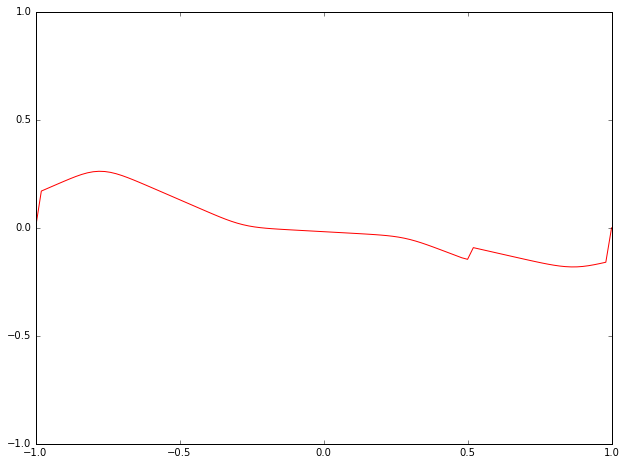

In [191]:
fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])
axis.clear()
axis.plot(x, np.array(Um)[:, 1], 'r') #, x, result[1][i], 'b')
axis.axis([a, b, -1, 1])


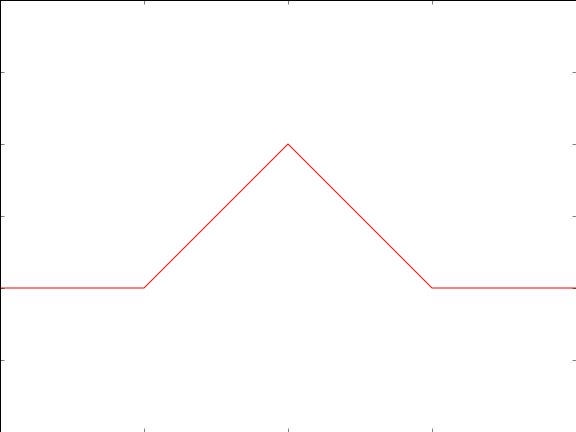
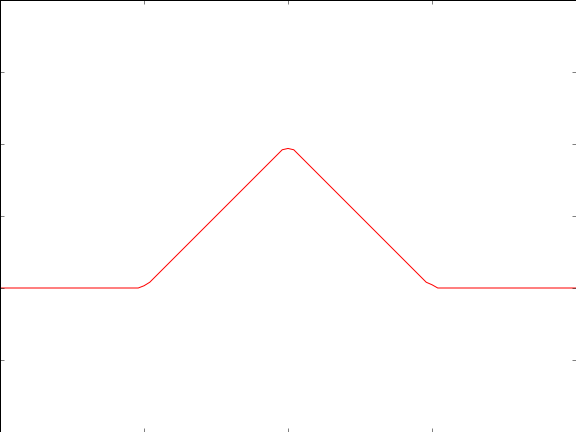
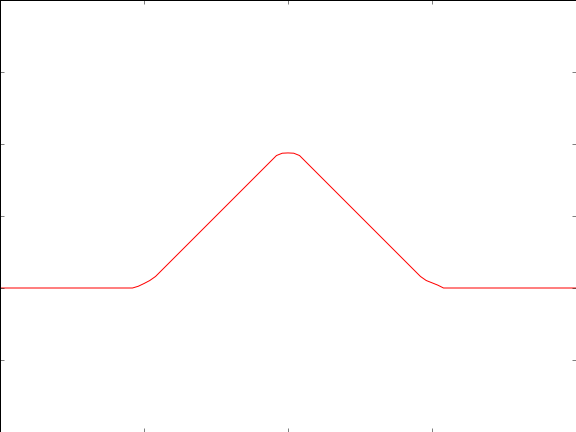
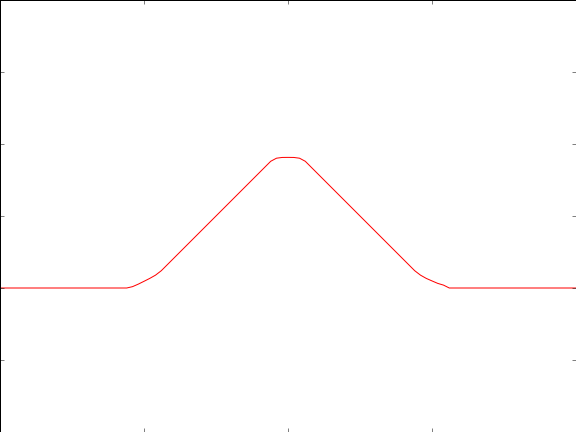
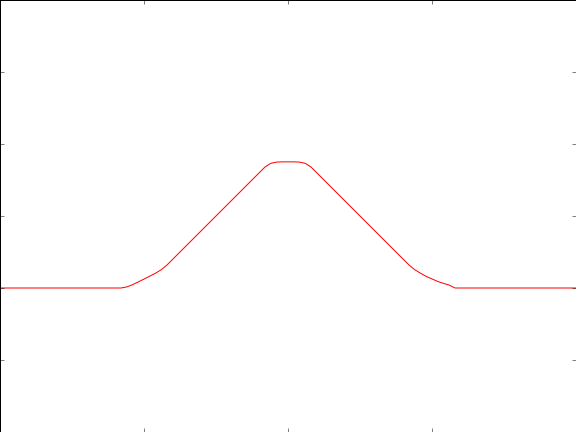
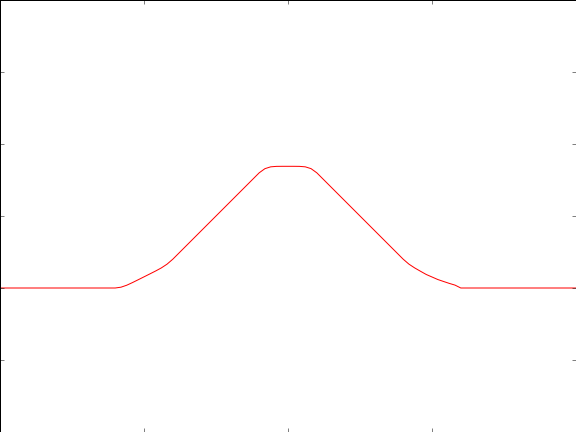
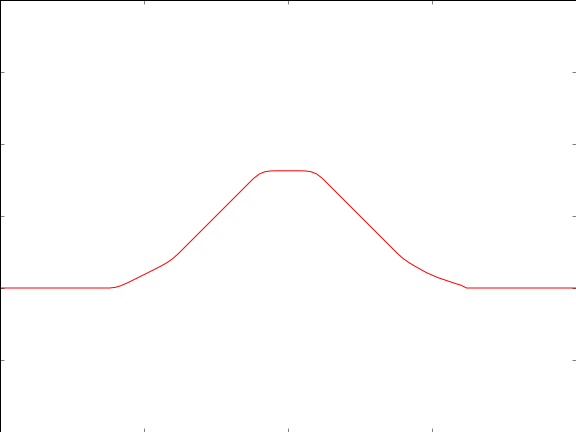
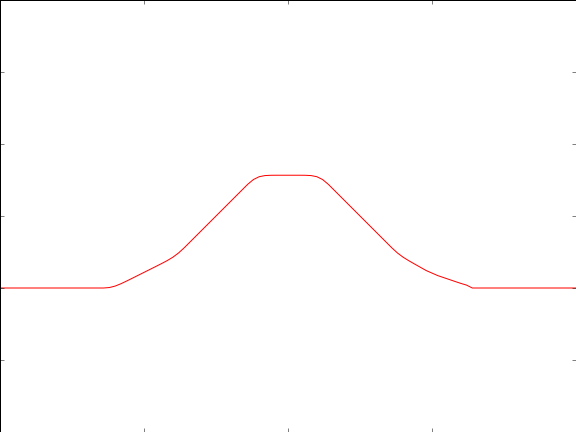
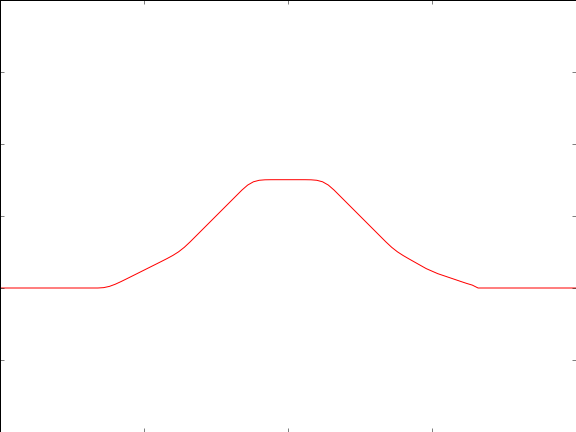
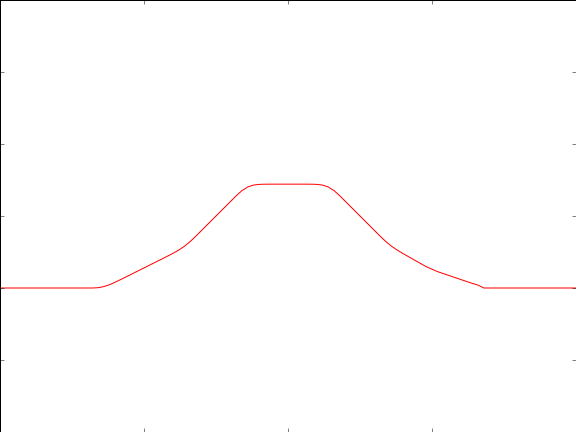
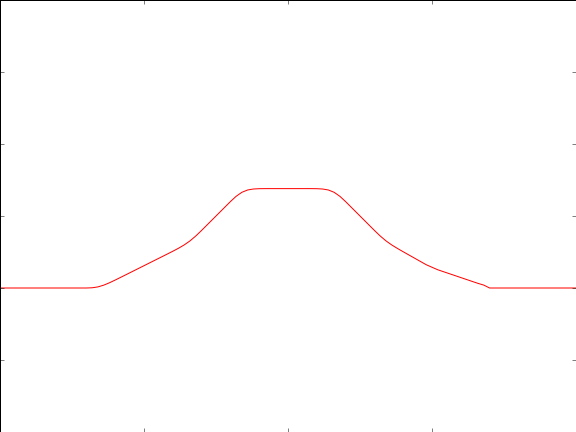
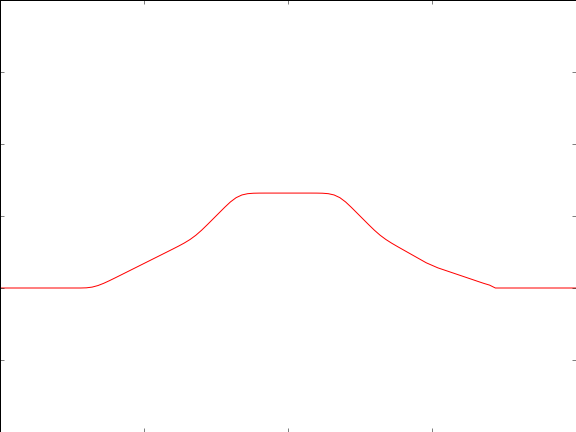
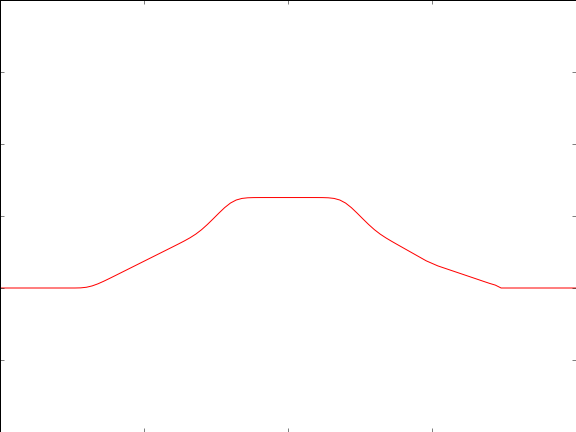
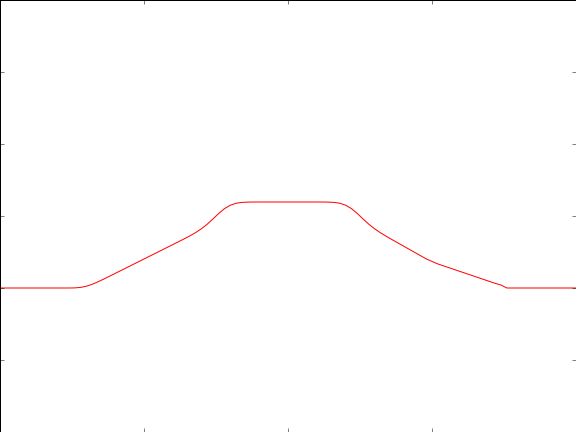
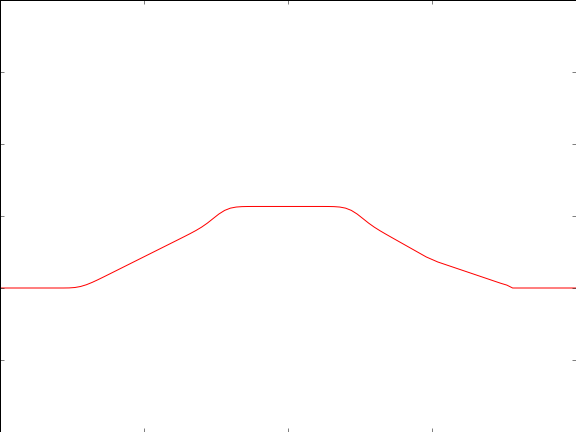
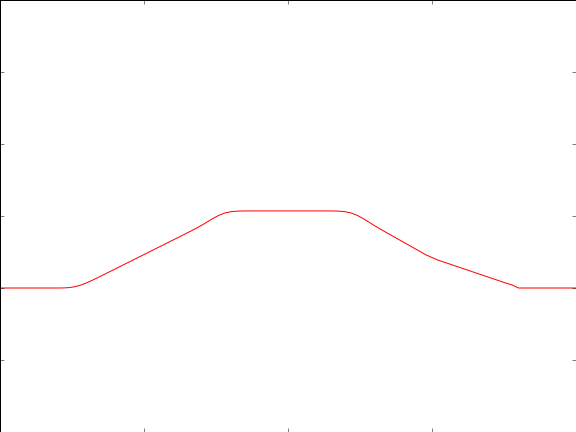
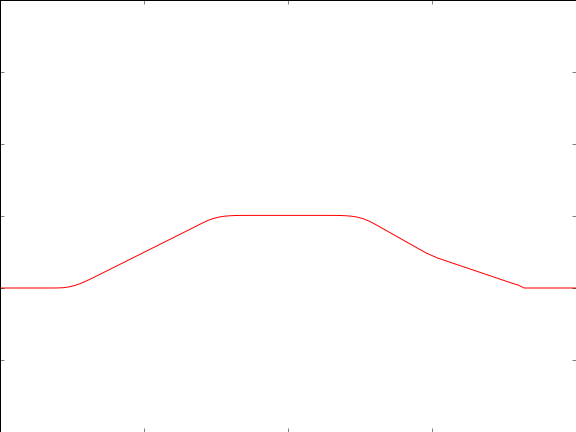
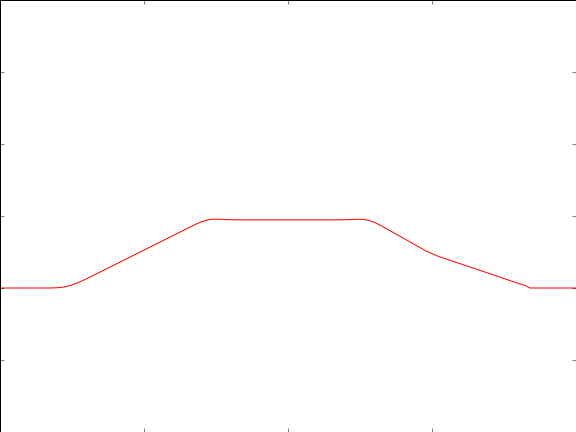
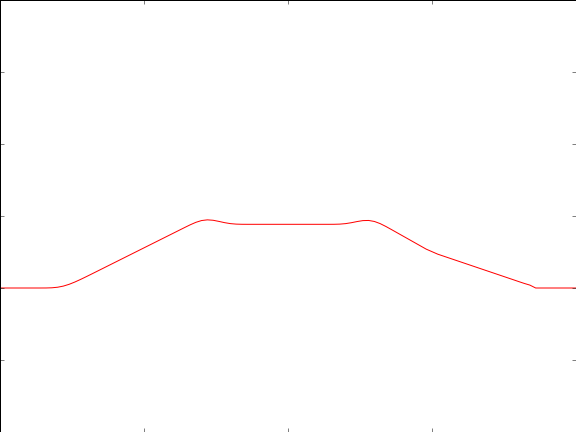
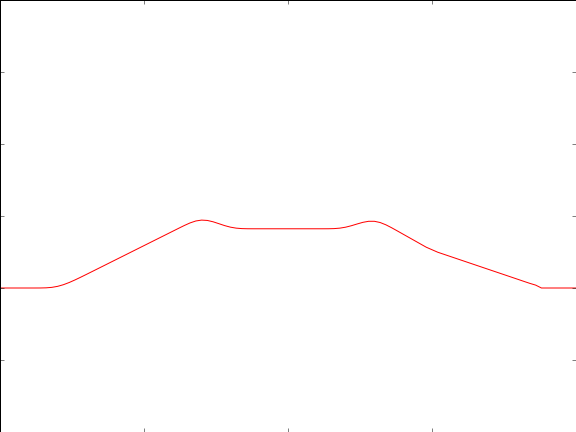
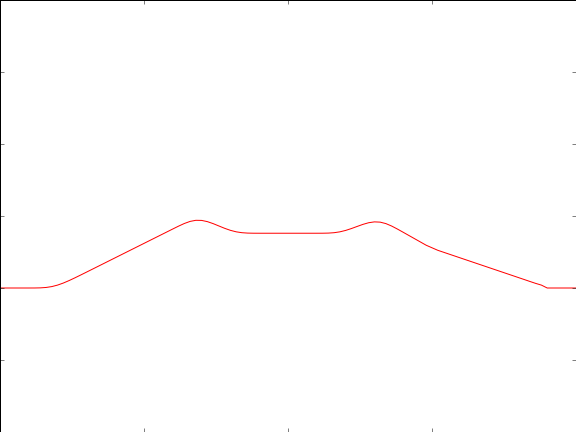
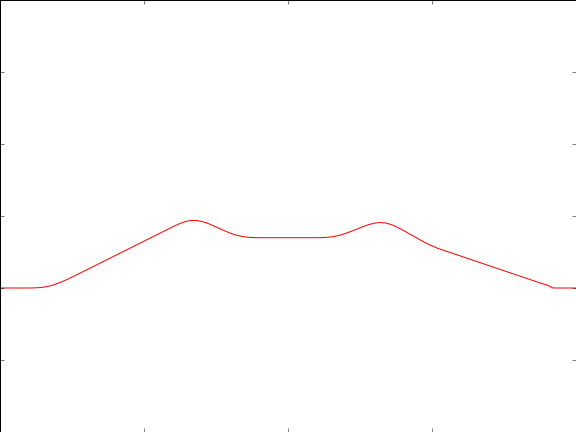
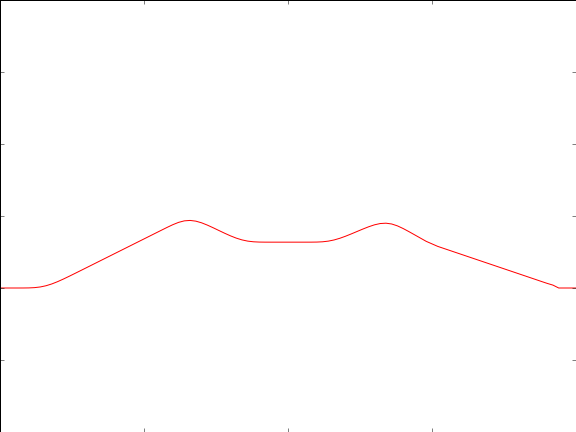
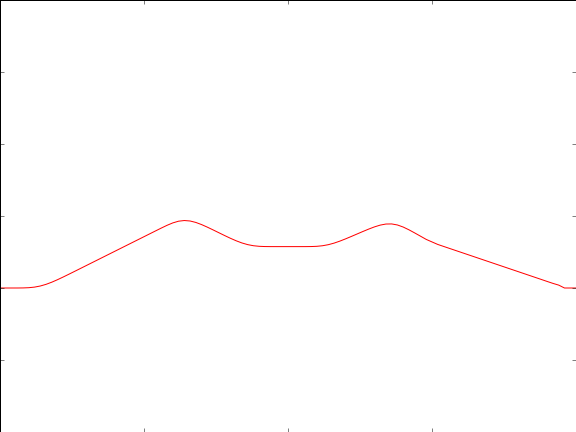
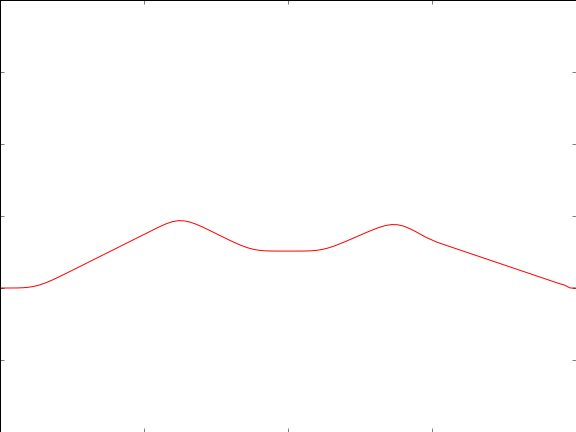
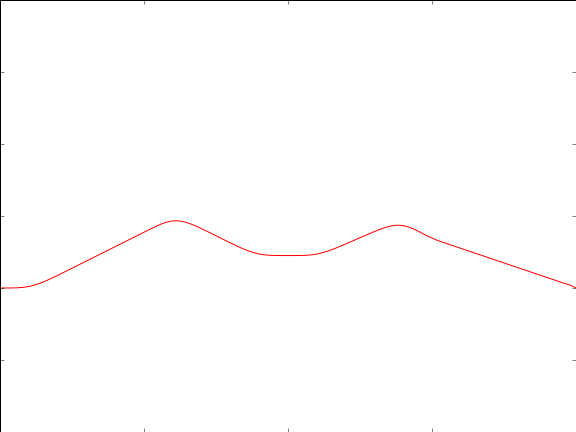
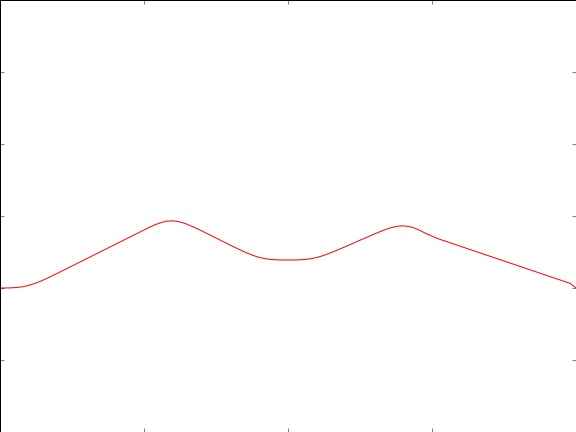
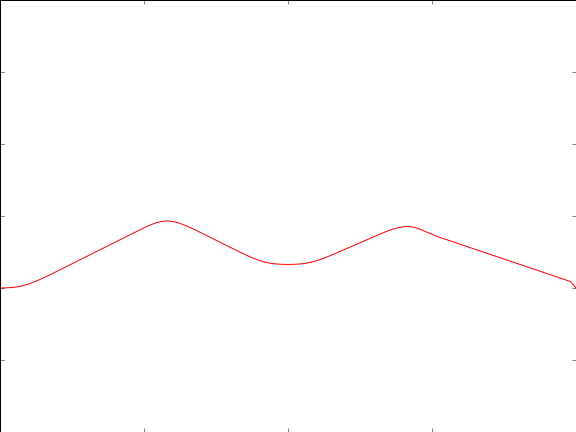
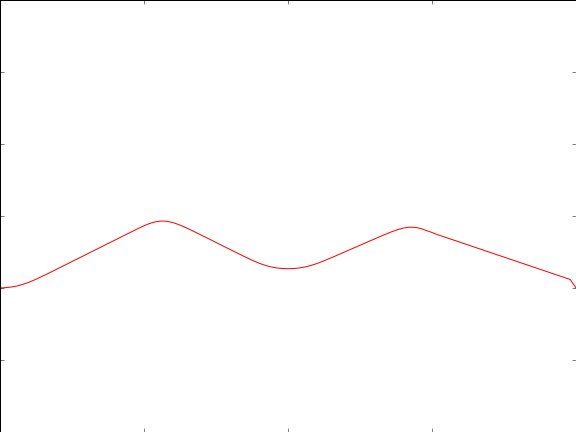
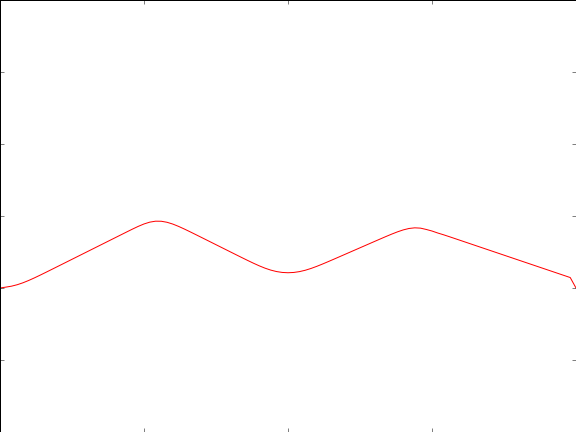
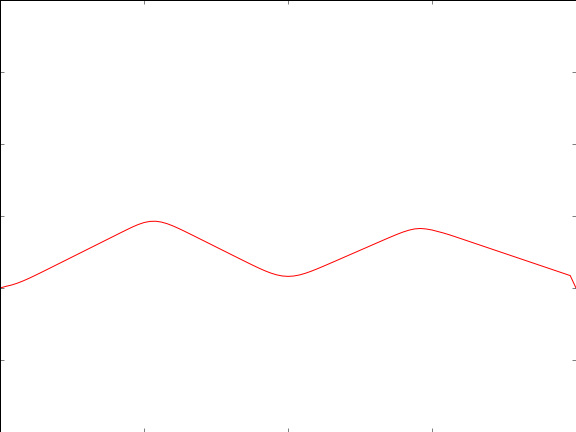
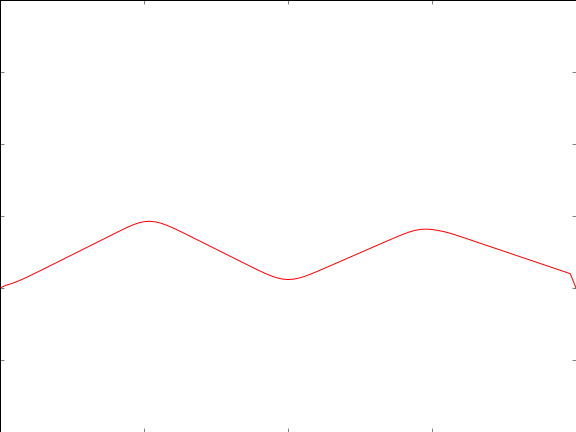
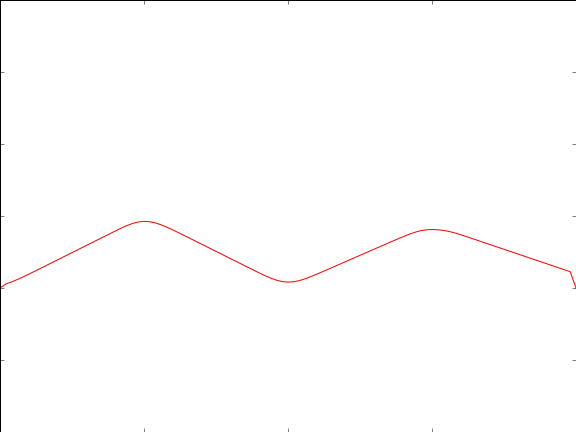
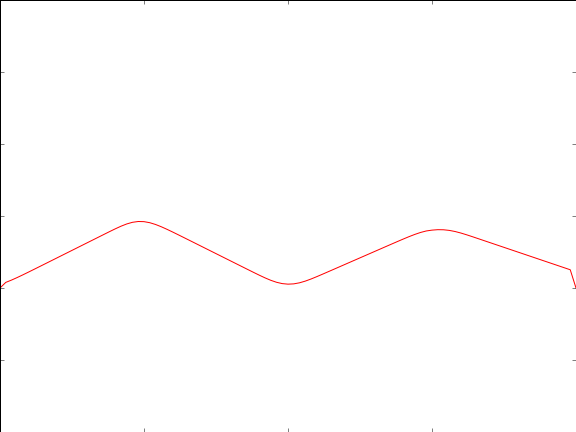
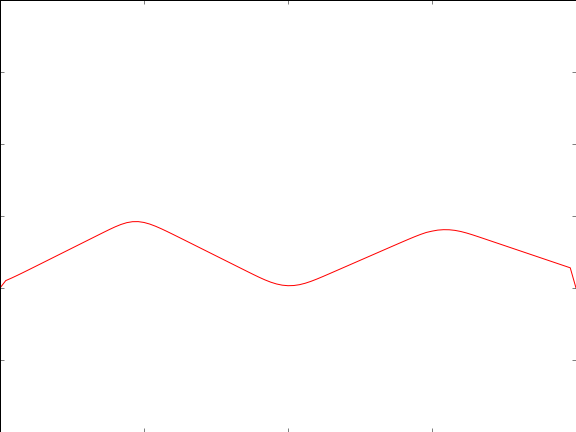
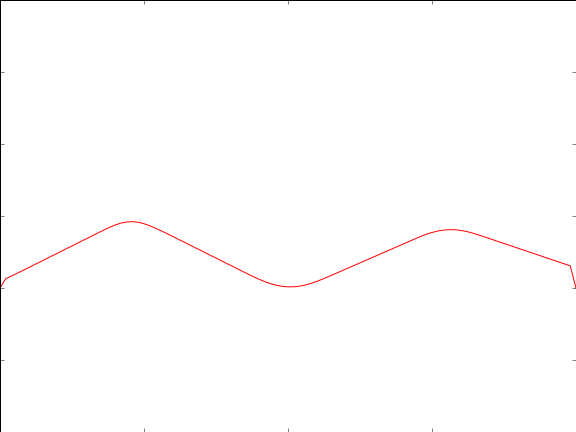
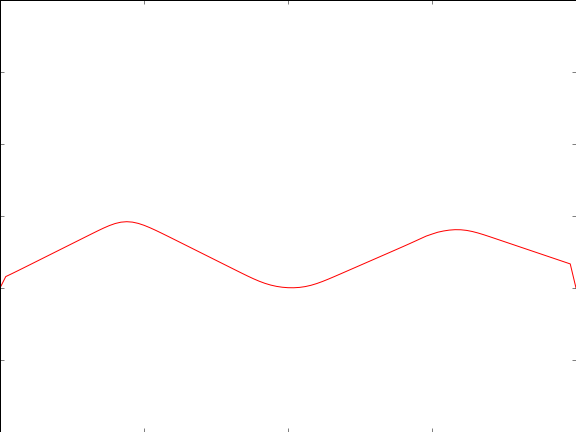
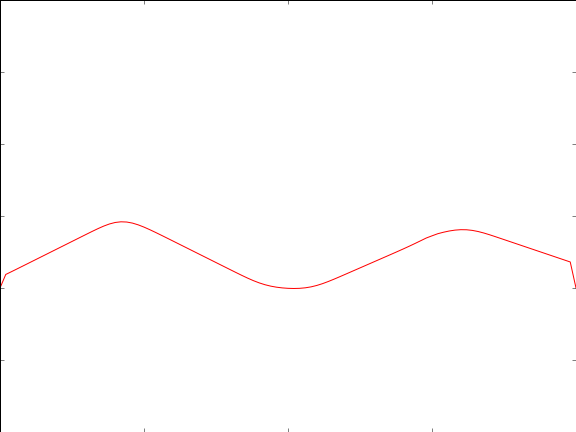
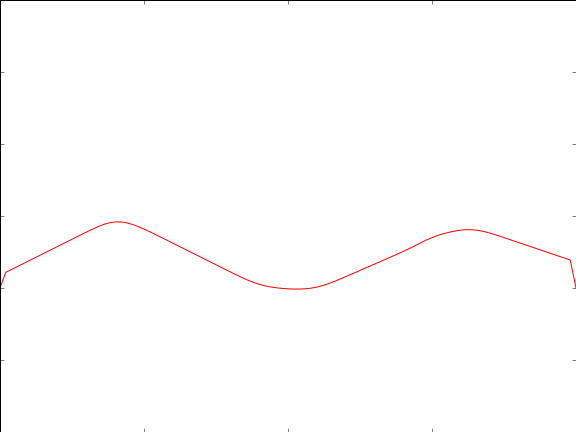
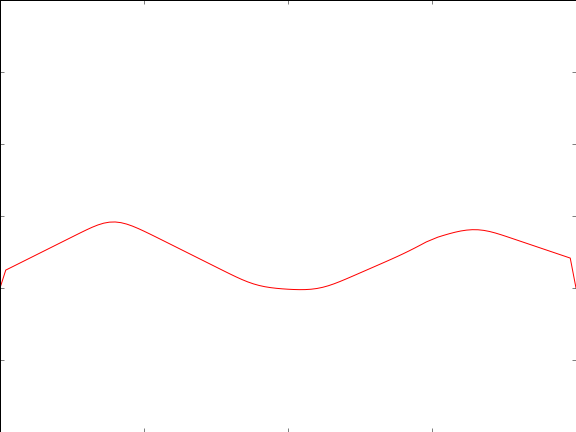
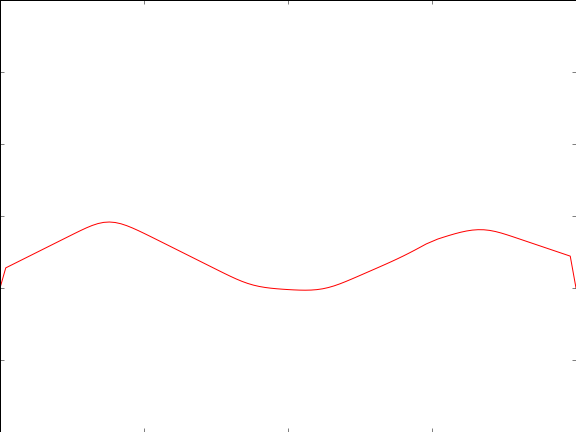
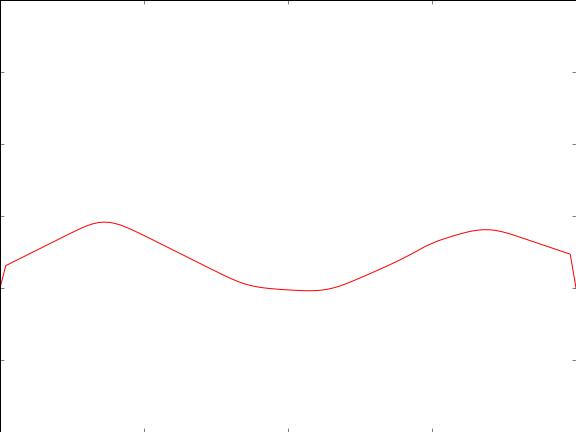
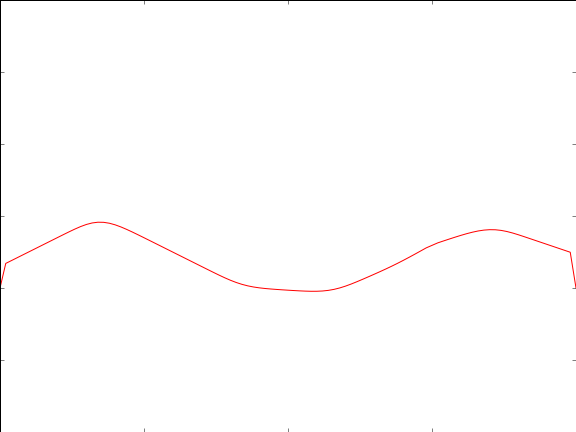
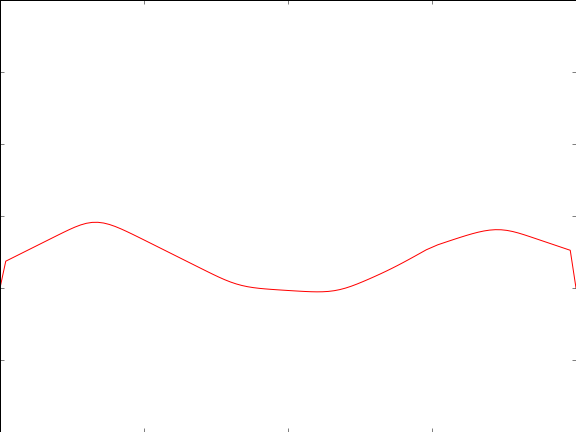
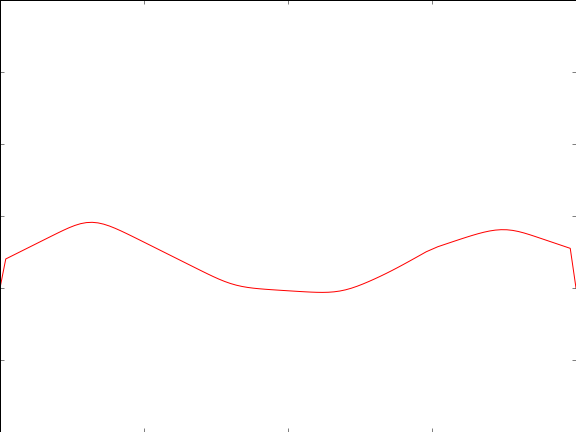
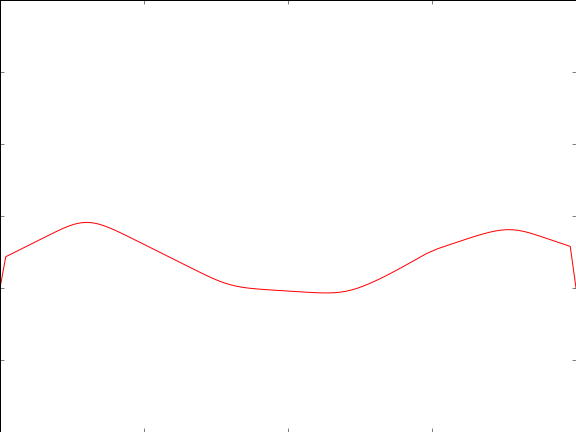
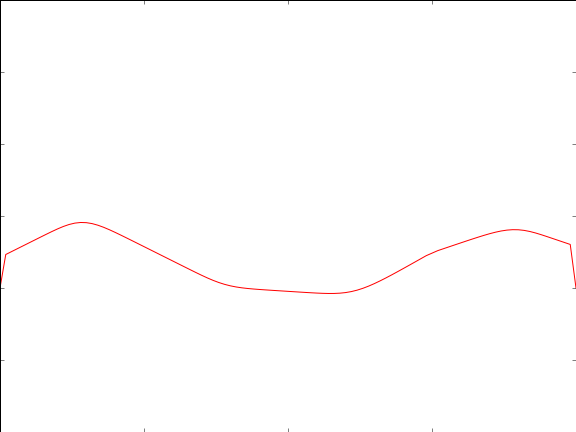
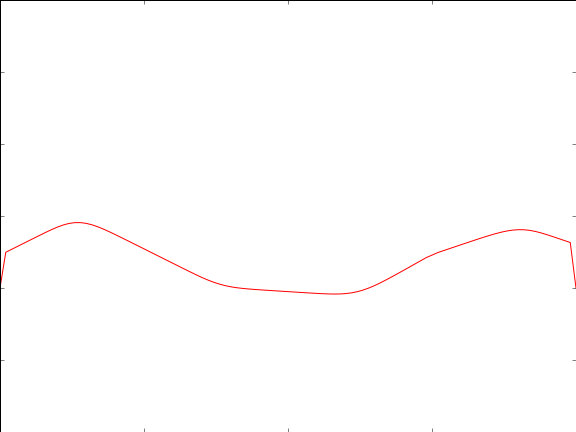
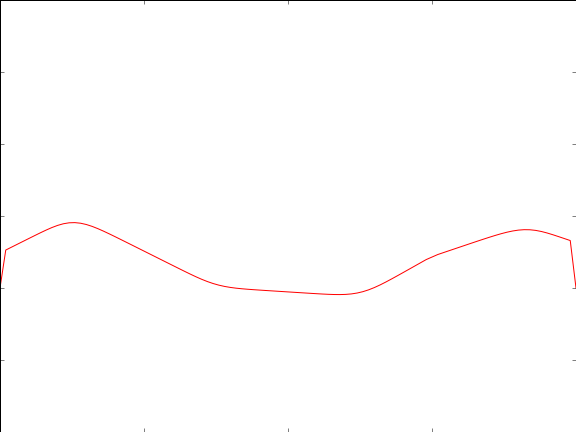
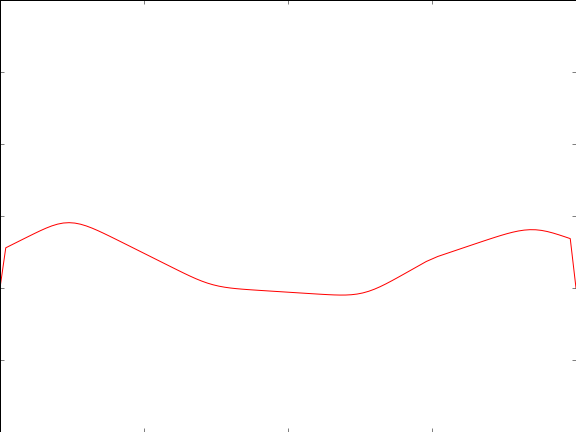
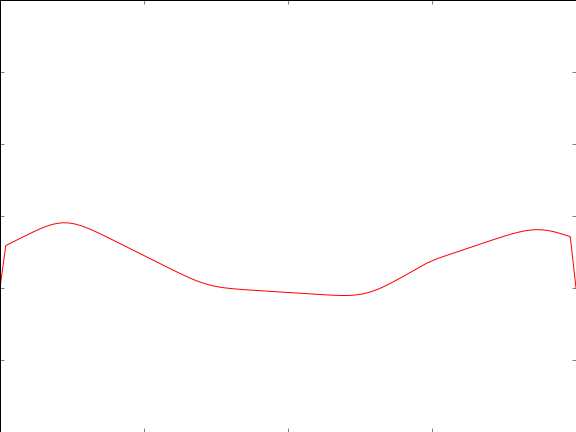

In [193]:
fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])

def animate(i):
    axis.clear()
    axis.plot(x, result[i], 'r') #, x, result[1][i], 'b')
    axis.axis([a, b, -1, 2])

def init():
    axis.plot(x, result[0], 'r') #, x, result[1][0], 'b')
    axis.axis([a, b, -1, 2])


animation.FuncAnimation(fig, animate, frames=len(result), 
                        init_func=init,interval=300, blit=False)